In [677]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [678]:
df = pd.read_excel('New York.xlsx')
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('Date', inplace = True)
df.drop(columns = ['year', 'month'], inplace= True)
df_Price = df.drop(columns=['stateDescription', 'sectorName', 'customers', 'revenue', 'sales'])

In [679]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = df_Price.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([14.9329605, 14.9329605, 14.9329605], dtype=float32)}

In [680]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [681]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

In [682]:
Y_pred_df

,mean_forecast
2024-01-01,14.932961
2024-02-01,14.932961
2024-03-01,14.932961


In [683]:
pd.concat([df_Price, Y_pred_df])

,price,mean_forecast
2001-01-01,11.53,NaN
2001-02-01,11.17,NaN
2001-03-01,11.01,NaN
2001-04-01,10.70,NaN
2001-05-01,10.97,NaN
...,...,...
2023-12-01,17.79,NaN
2024-01-01,18.88,NaN
2024-01-01,NaN,14.932961
2024-02-01,NaN,14.932961


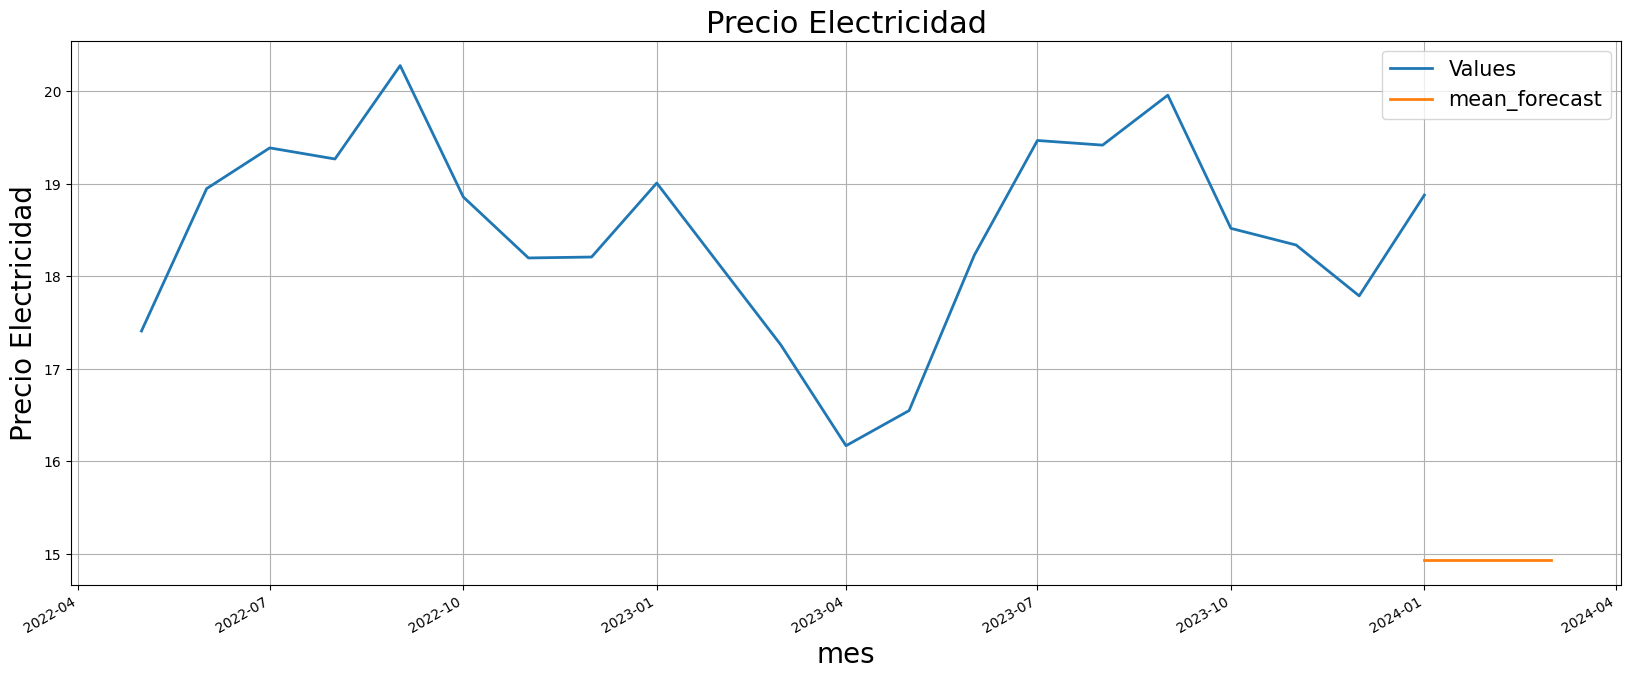

In [684]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']
plot_df[-24:][['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

No es el mejor modelo para hacer un pronostico 

In [685]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=df_Price.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18.88, 18.88, 18.88], dtype=float32)}

In [686]:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [687]:
Y_pred_df

,mean_forecast,naive_forecast
2024-01-01,14.932961,18.879999
2024-02-01,14.932961,18.879999
2024-03-01,14.932961,18.879999


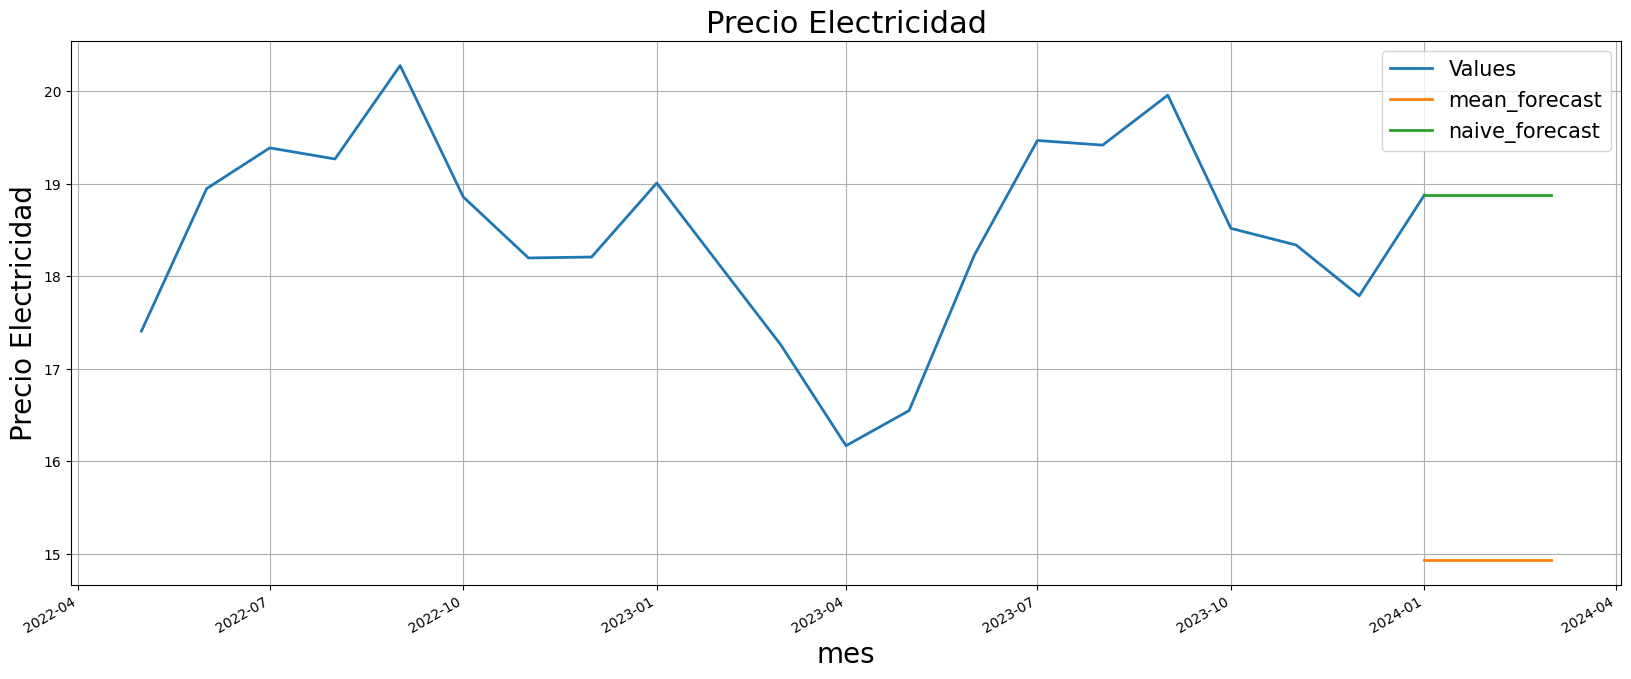

In [688]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

Vemos que este parece ajustarce mejor que la media 

In [689]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=df_Price.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18.09, 17.26, 16.17], dtype=float32)}

In [690]:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

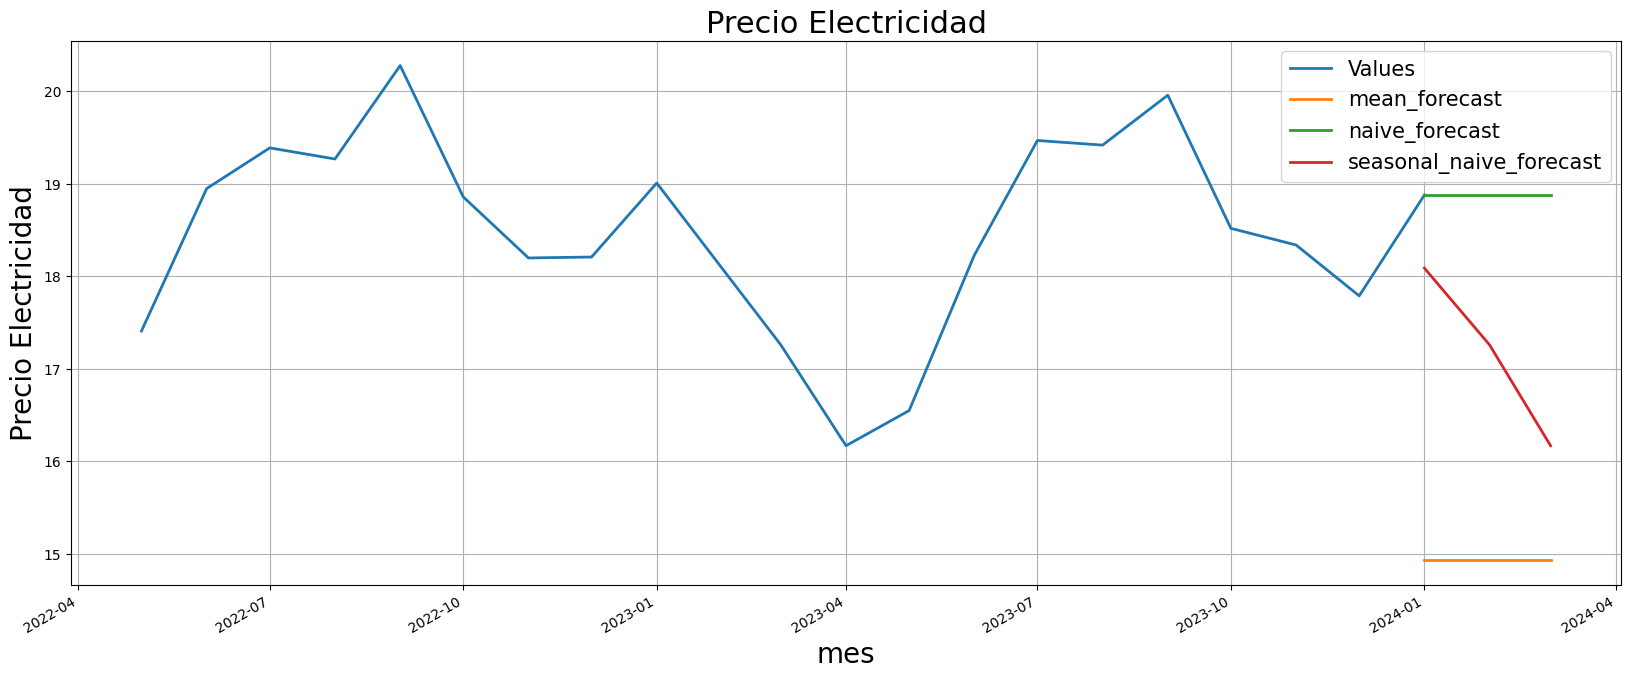

In [691]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

Creo que seria la mejor opcion ya que hay mucha estacionalidad en la serie de tiempo 

In [692]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=df_Price.values.reshape(-1,))
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([18.90663, 18.93326, 18.95989], dtype=float32)}

In [693]:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

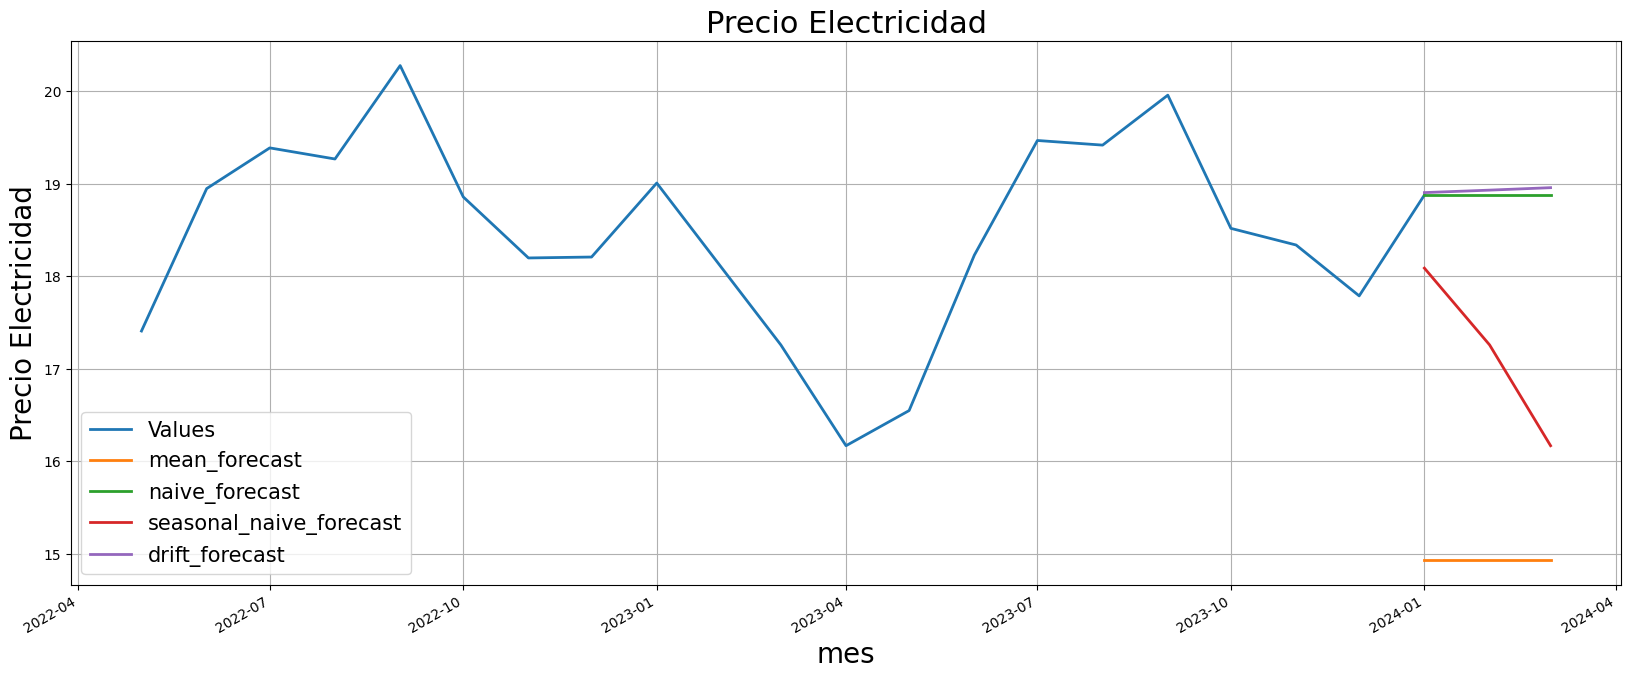

In [694]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([df_Price, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Precio Electricidad', fontsize=22)
ax.set_ylabel('Precio Electricidad', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
     

Vemos que no hay mucha tendenciia por lo que el drift se parece mucho al naive

# ***Residuales***

In [695]:
from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage

In [696]:
def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [697]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=df_Price.values.reshape(-1,))
mean = model.predict(h=12)

In [698]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",df_Price.index,df_Price.values.reshape(-1,))

In [699]:
augment_df

,model,time_var,obs_values,fitted_values,residuals
0,Mean,2001-01-01,11.53,NaN,NaN
1,Mean,2001-02-01,11.17,NaN,NaN
2,Mean,2001-03-01,11.01,NaN,NaN
3,Mean,2001-04-01,10.70,NaN,NaN
4,Mean,2001-05-01,10.97,NaN,NaN
...,...,...,...,...,...
272,Mean,2023-09-01,19.96,20.280001,-0.320001
273,Mean,2023-10-01,18.52,18.860001,-0.340001
274,Mean,2023-11-01,18.34,18.200001,0.139999
275,Mean,2023-12-01,17.79,18.209999,-0.419999


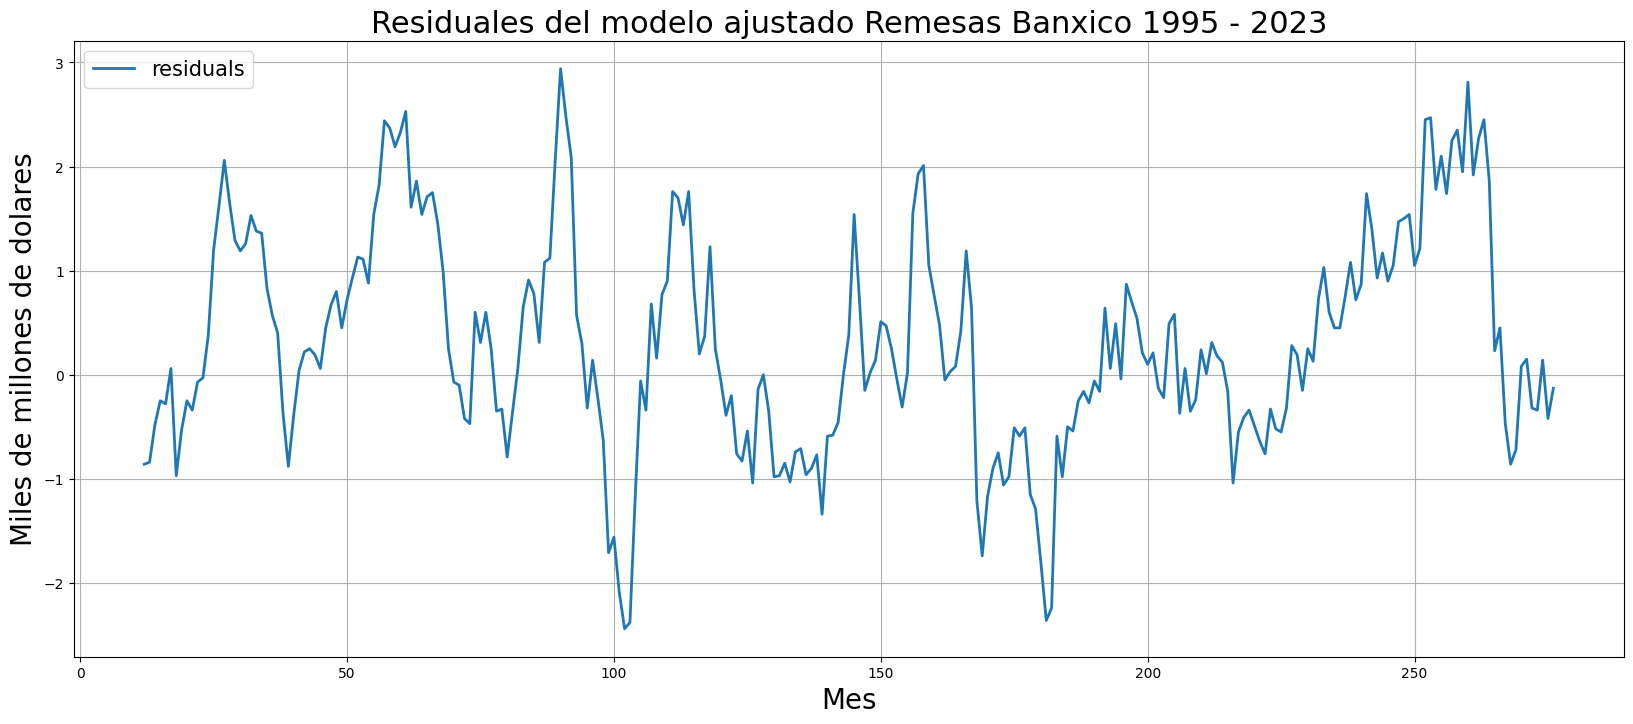

In [700]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado Remesas Banxico 1995 - 2023', fontsize=22)
ax.set_ylabel('Miles de millones de dolares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

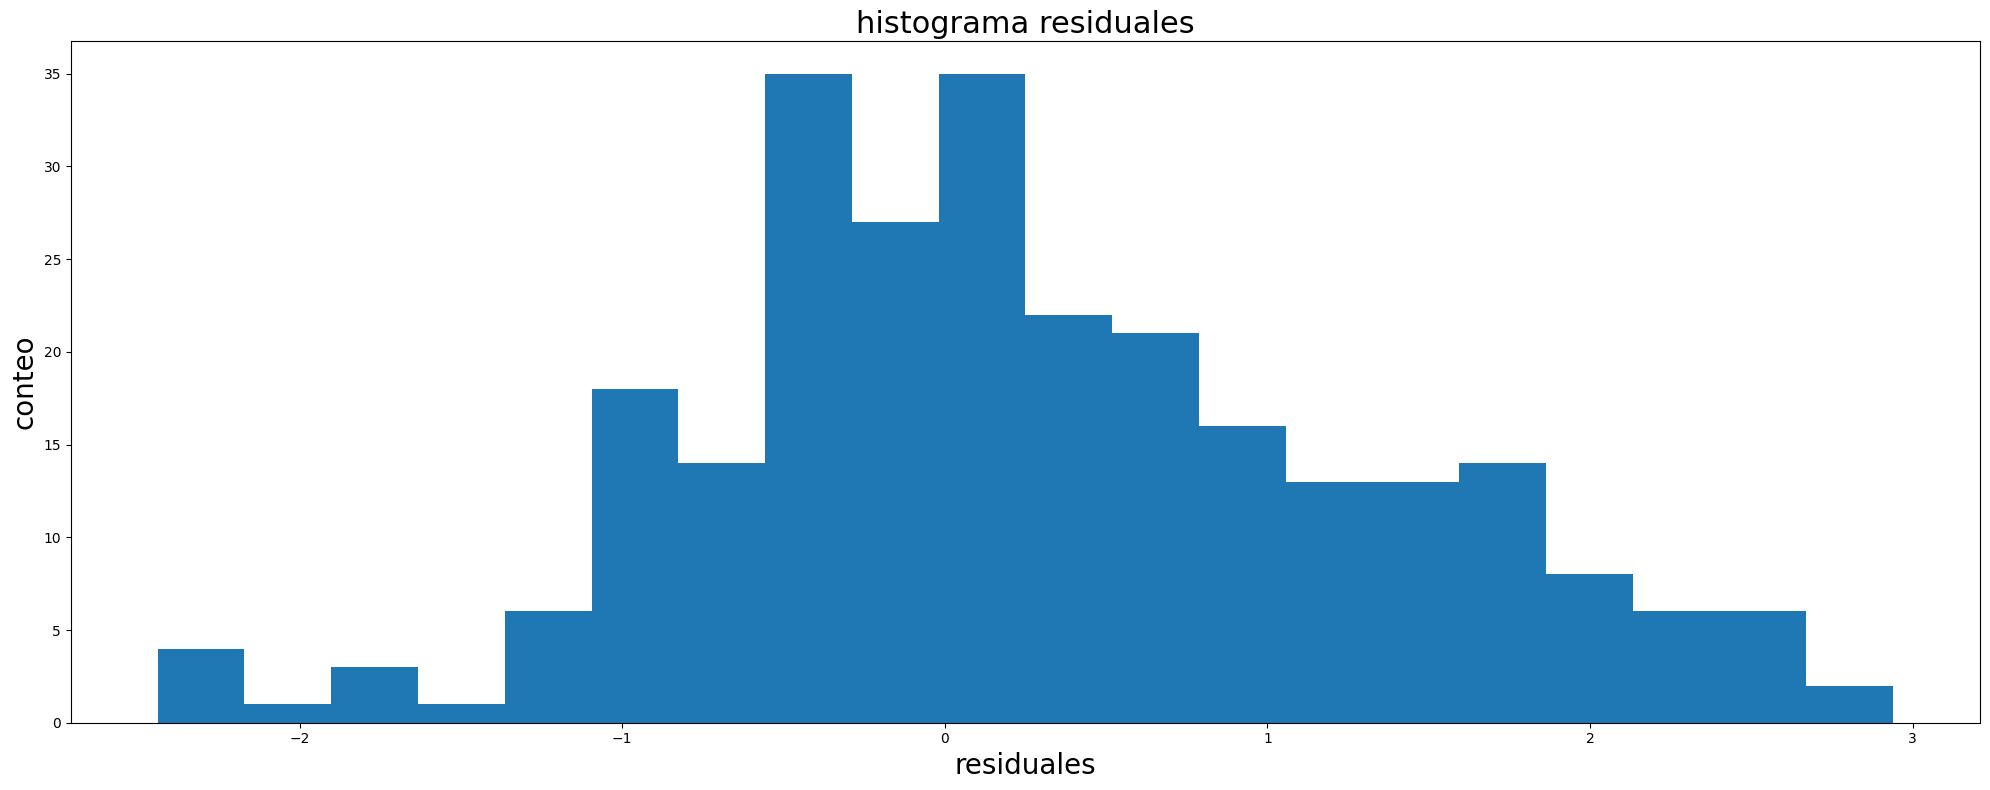

In [701]:
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Vemos como tenemos un sesgo derecho

Text(0, 0.5, 'ACF')

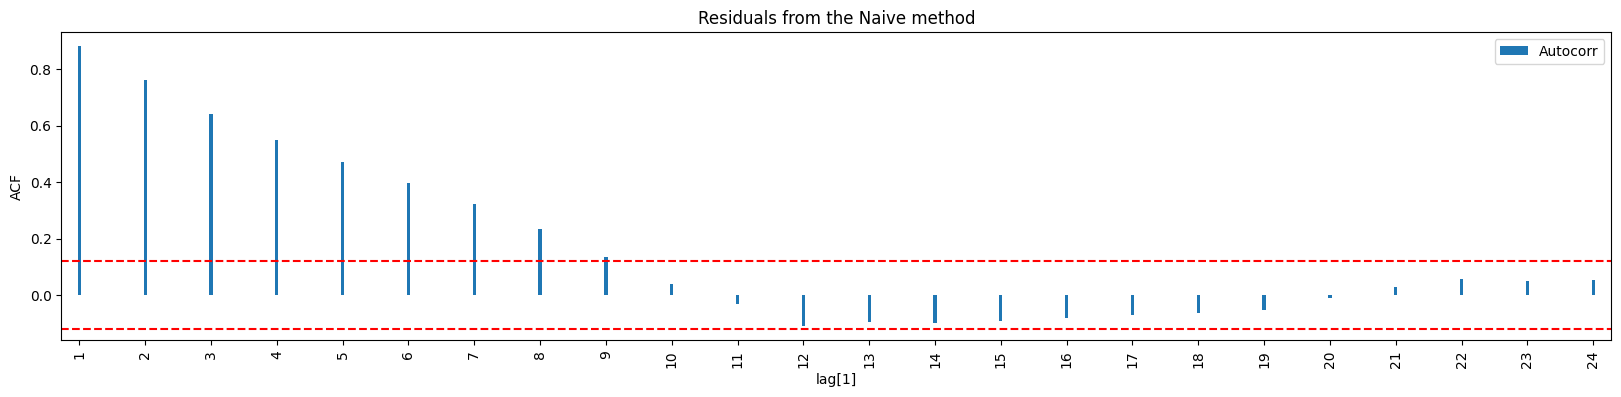

In [702]:
import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

In [703]:
import statsmodels

In [704]:
ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,66.931695,1.195627e-09


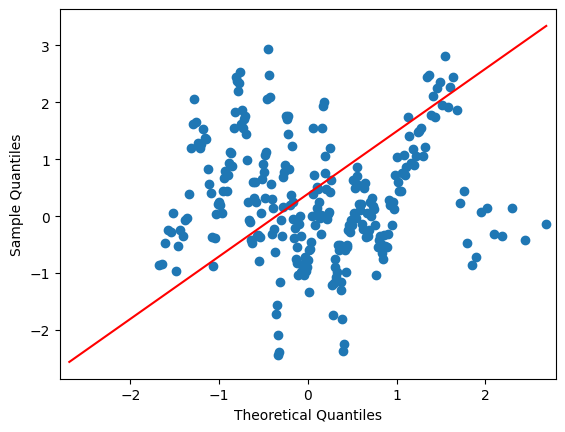

In [705]:
fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()

### **Regresion lineal**

### **Valores Atipicos**

In [706]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [707]:
q1=df_Price.quantile(0.25)
q3=df_Price.quantile(0.75)
iqr=q3-q1
iqr

price    2.18
dtype: float64

In [708]:
tabla=pd.DataFrame(index=df_Price.columns)
tabla['L_Inferior']=q1-1.5*iqr
tabla['L_superior']=q3+1.5*iqr
tabla

,L_Inferior,L_superior
price,10.53,19.25


<Axes: >

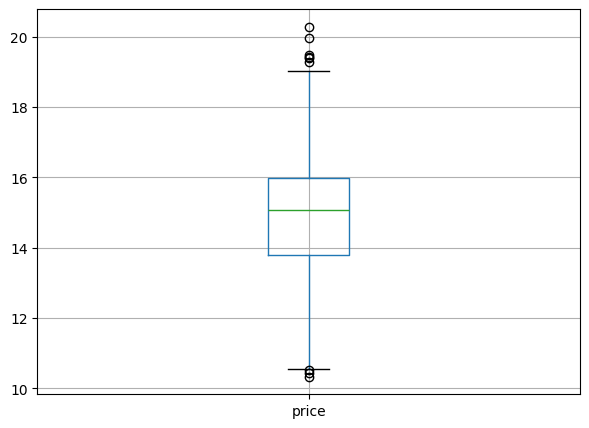

In [709]:
df_Price.boxplot(figsize=(7,5))

In [710]:
df

,stateDescription,sectorName,customers,price,revenue,sales
Date,,,,,,
2001-01-01,New York,all sectors,NaN,11.53,1469.53678,12747.77381
2001-02-01,New York,all sectors,NaN,11.17,1342.68513,12017.39501
2001-03-01,New York,all sectors,NaN,11.01,1298.68107,11790.13848
2001-04-01,New York,all sectors,NaN,10.70,1178.45470,11015.86386
2001-05-01,New York,all sectors,NaN,10.97,1208.33433,11019.82183
...,...,...,...,...,...,...
2023-09-01,New York,all sectors,8592508.0,19.96,2523.93708,12643.37308
2023-10-01,New York,all sectors,8580295.0,18.52,1982.04305,10701.98564
2023-11-01,New York,all sectors,8573822.0,18.34,2011.01912,10964.50087


## **Transformaciones**

In [711]:
df_Price.skew()

price   -0.087881
dtype: float64

In [712]:
df_Price.std()

price    1.97915
dtype: float64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

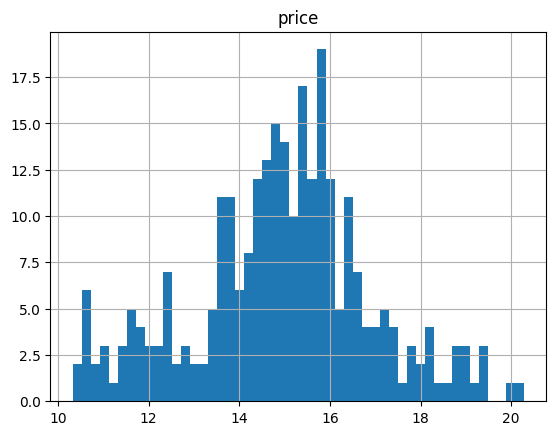

In [713]:
df_Price.hist(bins= 50)

<Axes: xlabel='Date'>

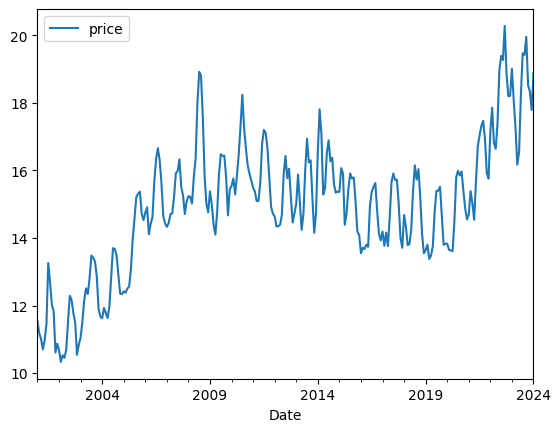

In [714]:
df_Price.plot()

### Eliminacion de datos antiguos 

In [715]:
df_Price["2006-01-01":].skew()

price    0.874754
dtype: float64

In [716]:
df_Price["2006-01-01":].std()

price    1.438821
dtype: float64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

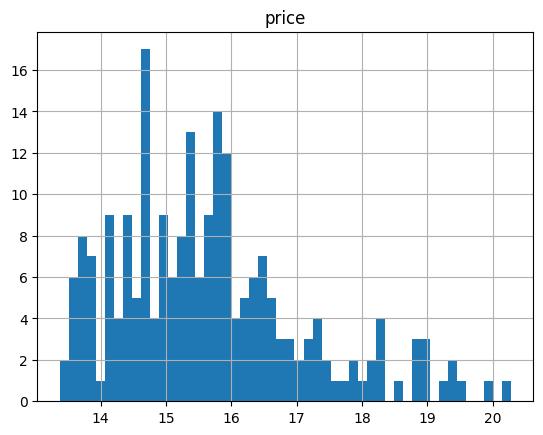

In [717]:
df_Price["2006-01-01":].hist(bins = 50)

<Axes: xlabel='Date'>

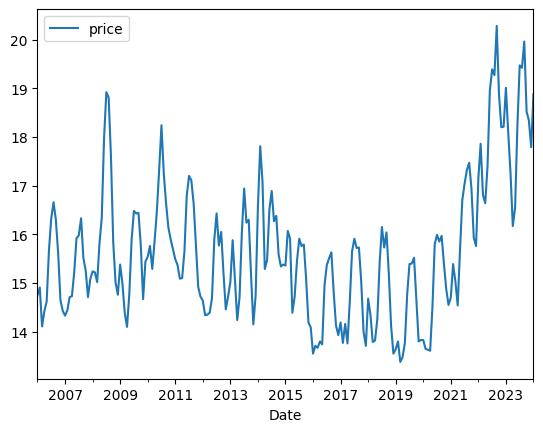

In [718]:
df_Price["2006-01-01":].plot()

Eliminamos los datos mas antiguos y que podrian ya no representar la realidad actual

Sin embargo vemos como esto nos afecta negativamente ya que perdemos un la normalidad de los datos 

### Diferenciacion 

In [719]:
df_Price.diff().skew()

price    0.0861
dtype: float64

In [720]:
df_Price.diff().std()

price    0.65989
dtype: float64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

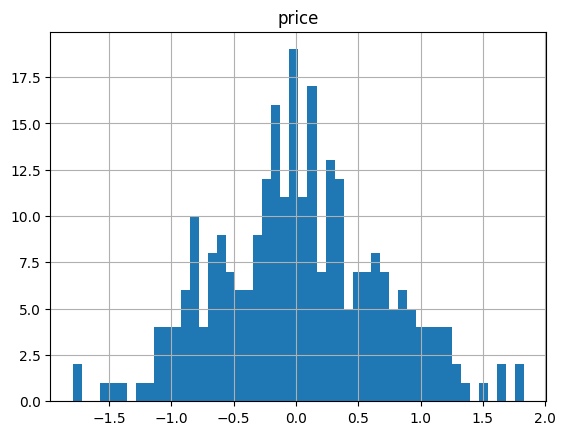

In [721]:
df_Price.diff().hist(bins = 50 )

<Axes: xlabel='Date'>

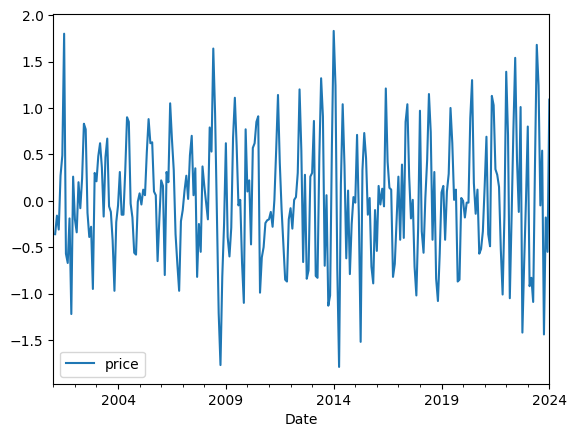

In [722]:
df_Price.diff().plot()

Con la diferenciacion o los retornos sin estandarisar, consiguimos una mayor normalidad de los datos ademas de que nos ayuda a observa atipocos sin embargo perdemos la estacionalidad 

### Retornos 

In [723]:
df_Price.pct_change().skew()

price    0.236136
dtype: float64

In [724]:
df_Price.pct_change().std()

price    0.043492
dtype: float64

<Axes: xlabel='Date'>

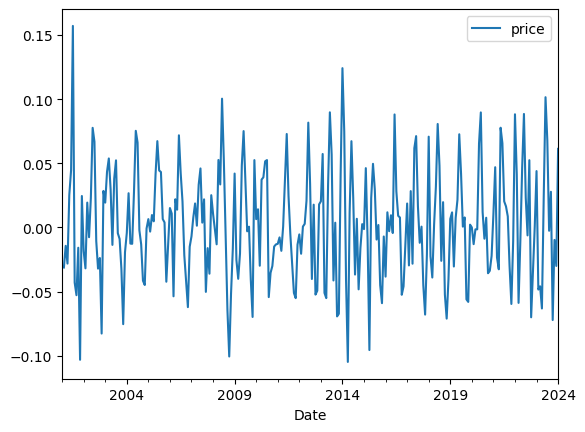

In [725]:
df_Price.pct_change().plot()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

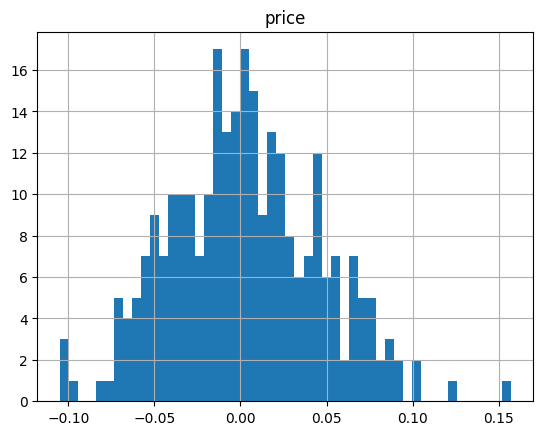

In [726]:
df_Price.pct_change().hist(bins = 50 )

Con los retornos como tal pasa algo muy parecido a con la diferenciacion 

### Min_Max

In [727]:
from sklearn.preprocessing import MinMaxScaler
import scipy as sp

In [728]:
mM=MinMaxScaler()
Z = mM.fit_transform(df_Price.values.reshape(-1,1))

In [729]:
sp.stats.skew(Z, bias=False)

array([-0.08788147])

In [730]:
Z.std()

0.19855021633696954

In [731]:
Z.mean()

0.46260907425212694

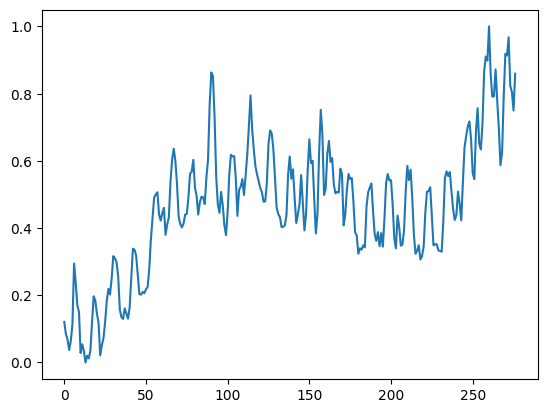

In [732]:
plt.plot(Z)

(array([ 2.,  6.,  2.,  3.,  1.,  3.,  5.,  4.,  3.,  3.,  7.,  2.,  3.,
         2.,  2.,  5., 11., 11.,  6.,  8., 12., 13., 15., 14., 10., 17.,
        12., 19., 12.,  5., 11.,  7.,  4.,  4.,  5.,  4.,  1.,  3.,  2.,
         4.,  1.,  1.,  3.,  3.,  1.,  3.,  0.,  0.,  1.,  1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

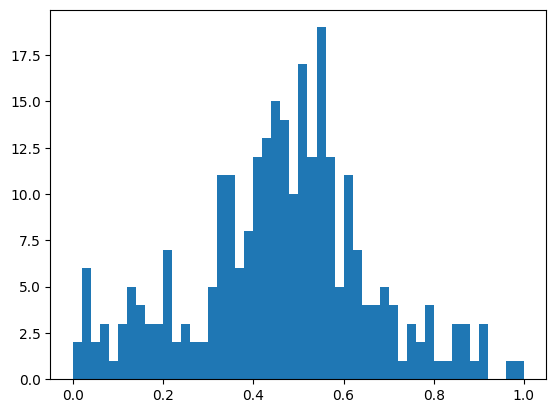

In [733]:
plt.hist(Z, bins=50)

Vemos como casi no hay ningun cambio mas que la escala como tal 

### Estandarizacion 

In [734]:
from sklearn.preprocessing import StandardScaler

In [735]:
est = StandardScaler()
Z = est.fit_transform(df_Price.values.reshape(-1,1))

In [736]:
sp.stats.skew(Z, bias=False)

array([-0.08788147])

In [737]:
Z.std()

1.0000000000000002

In [738]:
Z.mean()

-6.156326952434081e-16

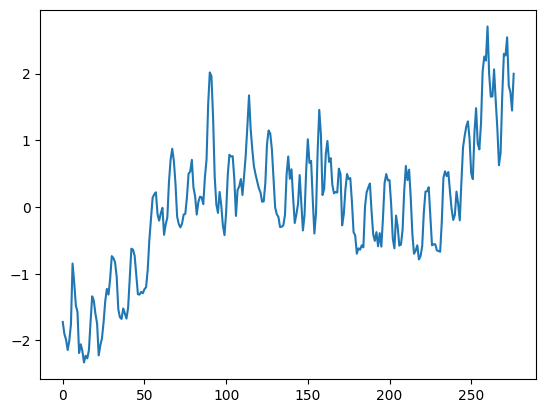

In [739]:
plt.plot(Z)

(array([ 2.,  6.,  2.,  3.,  1.,  3.,  5.,  4.,  3.,  3.,  7.,  2.,  3.,
         2.,  2.,  5., 11., 11.,  6.,  8., 12., 13., 15., 14., 10., 17.,
        12., 19., 12.,  5., 11.,  7.,  4.,  4.,  5.,  4.,  1.,  3.,  2.,
         4.,  1.,  1.,  3.,  3.,  1.,  3.,  0.,  0.,  1.,  1.]),
 array([-2.32993488, -2.22920469, -2.12847451, -2.02774432, -1.92701414,
        -1.82628395, -1.72555377, -1.62482358, -1.5240934 , -1.42336321,
        -1.32263303, -1.22190285, -1.12117266, -1.02044248, -0.91971229,
        -0.81898211, -0.71825192, -0.61752174, -0.51679155, -0.41606137,
        -0.31533118, -0.214601  , -0.11387081, -0.01314063,  0.08758956,
         0.18831974,  0.28904993,  0.38978011,  0.4905103 ,  0.59124048,
         0.69197067,  0.79270085,  0.89343104,  0.99416122,  1.09489141,
         1.19562159,  1.29635178,  1.39708196,  1.49781215,  1.59854233,
         1.69927252,  1.8000027 ,  1.90073289,  2.00146307,  2.10219326,
         2.20292344,  2.30365363,  2.40438381,  2.505114  ,

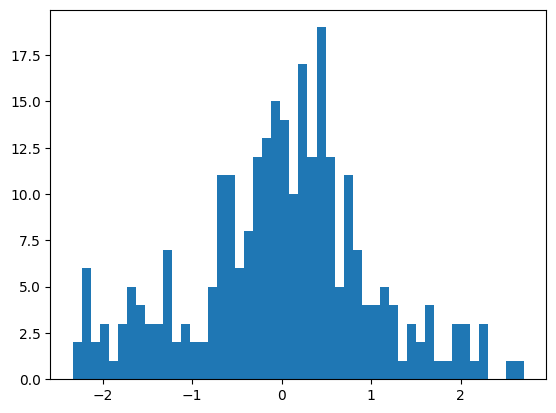

In [740]:
plt.hist(Z, bins=50)

### Outliers

In [741]:
outliers = np.abs(sp.stats.zscore(df_Price)) > 2

In [742]:
outliers.sum()

price    20
dtype: int64

### Tukey Fence
1.5 (o 3) veces el rango intercuartílico

In [743]:
q1=df_Price.quantile(0.25)
q3=df_Price.quantile(0.75)
iqr=q3-q1
iqr

price    2.18
dtype: float64

In [744]:
tabla=pd.DataFrame(index=["price"])
tabla['L_Inferior']=q1-1.5*iqr
tabla['L_superior']=q3+1.5*iqr
tabla

,L_Inferior,L_superior
price,10.53,19.25


In [745]:
tabla=pd.DataFrame(index=["price"])
tabla['L_Inferior']=q1-3*iqr
tabla['L_superior']=q3+3*iqr
tabla

,L_Inferior,L_superior
price,7.26,22.52


In [746]:
can_out = df_Price > q3+1.5*iqr
can_out.sum()

price    6
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9090f3a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9090f3f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9090f3790>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9090ec460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9090ec700>],
 'means': []}

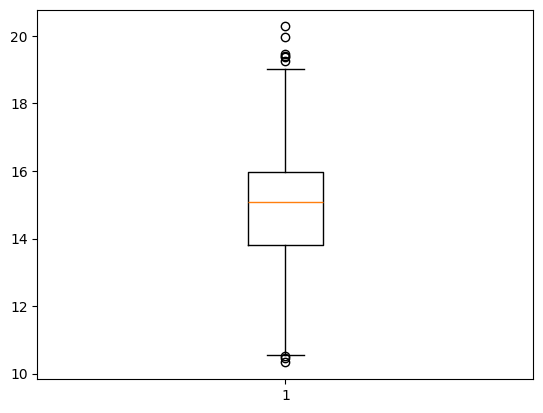

In [747]:
plt.boxplot(df_Price)

<Axes: >

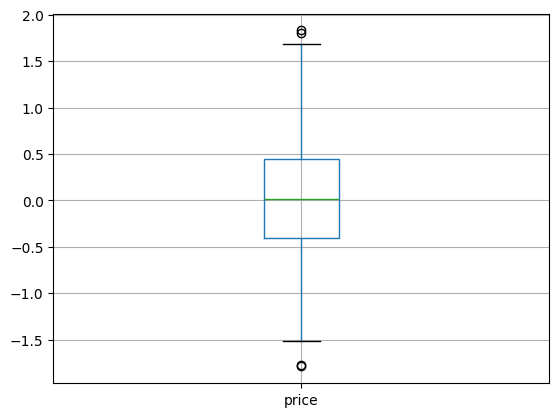

In [748]:
df_Price.diff().boxplot()

In [749]:
q3_diff = df_Price.diff().quantile(0.75)
q1_diff = df_Price.diff().quantile(0.25)
iqr_diff = q3_diff - q1_diff

can_out_diff = df_Price.diff() > q3_diff+1.5*iqr_diff
can_out_diff.sum()

price    2
dtype: int64

No vemos gran cambio en la cantidad de atipicos que tenemos 

### Sustitucion de Outliers

Podemos sustituir por la media  
Por fechas importantes por ejemplo con el cambio porcentual 

### Transformaciones Matematicas

In [750]:
np.log(df_Price).skew()

price   -0.498513
dtype: float64

In [751]:
np.log(df_Price).std()

price    0.136422
dtype: float64

<Axes: xlabel='Date'>

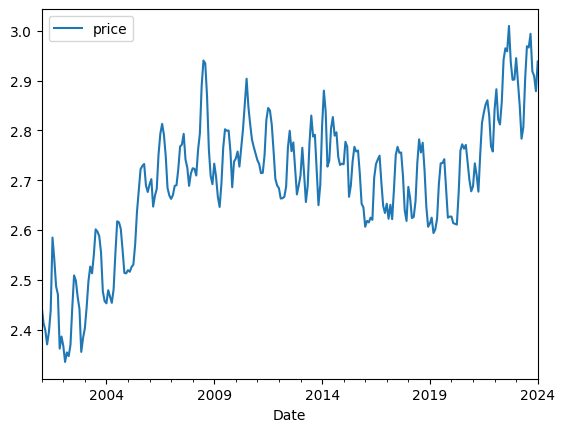

In [752]:
np.log(df_Price).plot()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

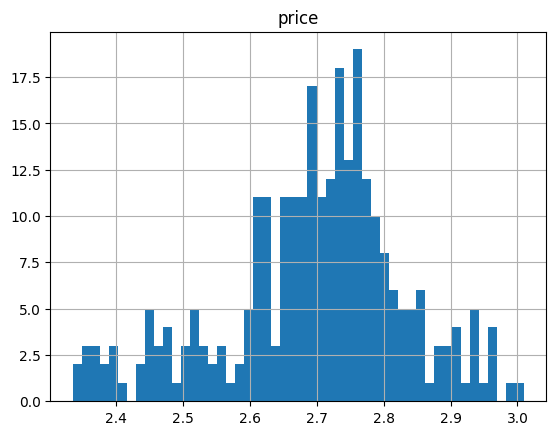

In [753]:
np.log(df_Price).hist(bins = 50)

Vemos como la escala, el sesgo y la distribucion en general mejoran pero no es tan mejor 

### BoxCox

In [754]:
from sklearn.preprocessing import PowerTransformer

In [755]:
BoxCox = PowerTransformer(method = "box-cox")
B = BoxCox.fit_transform(df_Price)

In [756]:
sp.stats.skew(B, bias=False)

array([0.00148594])

In [757]:
np.std(B)

1.0

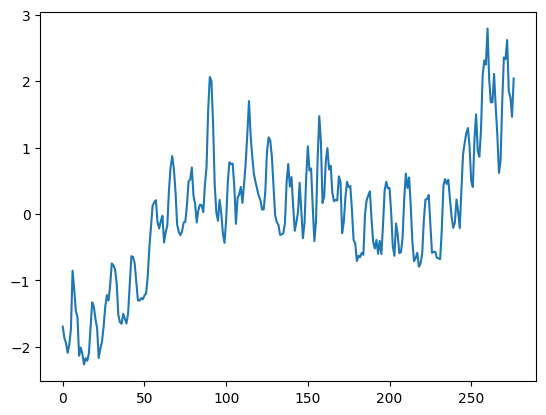

In [758]:
plt.plot(B)

(array([ 4.,  4.,  3.,  3.,  0.,  5.,  5.,  5.,  2.,  6.,  3.,  3.,  2.,
         2.,  3., 11., 14.,  3., 11., 11., 12., 17., 12., 10., 18., 12.,
        16., 16.,  4., 10.,  8.,  4.,  4.,  4.,  5.,  2.,  2.,  2.,  2.,
         4.,  1.,  0.,  5.,  1.,  1.,  3.,  0.,  0.,  1.,  1.]),
 array([-2.26606491, -2.16485195, -2.06363898, -1.96242602, -1.86121306,
        -1.7600001 , -1.65878713, -1.55757417, -1.45636121, -1.35514824,
        -1.25393528, -1.15272232, -1.05150936, -0.95029639, -0.84908343,
        -0.74787047, -0.64665751, -0.54544454, -0.44423158, -0.34301862,
        -0.24180565, -0.14059269, -0.03937973,  0.06183323,  0.1630462 ,
         0.26425916,  0.36547212,  0.46668508,  0.56789805,  0.66911101,
         0.77032397,  0.87153694,  0.9727499 ,  1.07396286,  1.17517582,
         1.27638879,  1.37760175,  1.47881471,  1.58002768,  1.68124064,
         1.7824536 ,  1.88366656,  1.98487953,  2.08609249,  2.18730545,
         2.28851841,  2.38973138,  2.49094434,  2.5921573 ,

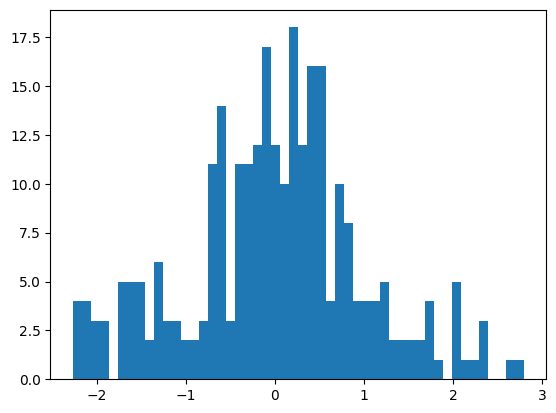

In [759]:
plt.hist(B, bins=50)

Con BoxCox Vemos como en genreal tenemos una mejora por lo que podriamos decir que puede ser la mejor transformacion para nuestra serie de tiempo 

## **Regresion Lineal**

In [760]:
import yfinance as yf

In [761]:
stock = 'MXN=X'
ticker = yf.Ticker(stock)
usdmxn = ticker.history(start= '1993-01-01', end= '2023-12-31', interval='1mo')['Close']

usdmxn.head()

Date
2003-12-01 00:00:00+00:00    11.191
2004-01-01 00:00:00+00:00    11.048
2004-02-01 00:00:00+00:00    11.055
2004-03-01 00:00:00+00:00    11.105
2004-04-01 00:00:00+01:00    11.352
Name: Close, dtype: float64

In [762]:
df_Price = df_Price["2003":]

In [763]:
usdmxn = usdmxn["2004":]

In [764]:
usdmxn.index = usdmxn.index.strftime('%Y-%m')
usdmxn.index = pd.to_datetime(usdmxn.index)
usdmxn.head()

Date
2004-01-01    11.048
2004-02-01    11.055
2004-03-01    11.105
2004-04-01    11.352
2004-05-01    11.427
Name: Close, dtype: float64

In [765]:
df_Price = df_Price.join(usdmxn)

In [766]:
getattr(df_Price.index, 'month_name')

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
               '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)>

In [767]:
df_Price['mes'] = df_Price.index.month_name()
df_Price

,price,Close,mes
Date,,,
2003-01-01,11.05,NaN,January
2003-02-01,11.53,NaN,February
2003-03-01,12.15,NaN,March
2003-04-01,12.51,NaN,April
2003-05-01,12.34,NaN,May
...,...,...,...
2023-09-01,19.96,17.403900,September
2023-10-01,18.52,18.048100,October
2023-11-01,18.34,17.282801,November


In [768]:
df_Price = pd.get_dummies(df_Price, columns=['mes'], prefix="", prefix_sep="", drop_first=True, dtype=float)
df_Price

,price,Close,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,
2003-01-01,11.05,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-02-01,11.53,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-03-01,12.15,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2003-04-01,12.51,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-05-01,12.34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,19.96,17.403900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-10-01,18.52,18.048100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-11-01,18.34,17.282801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [769]:
df_Price['lag1'] = df_Price['price'].shift(1)
df_Price['lag2'] = df_Price['price'].shift(2)
df_Price['lag3'] = df_Price['price'].shift(3)
df_Price['lag4'] = df_Price['price'].shift(4)
df_Price['lag5'] = df_Price['price'].shift(5)
df_Price['lag6'] = df_Price['price'].shift(6)
df_Price['lag7'] = df_Price['price'].shift(7)
df_Price['lag8'] = df_Price['price'].shift(8)
df_Price['lag9'] = df_Price['price'].shift(9)
df_Price['lag10'] = df_Price['price'].shift(10)
df_Price['lag11'] = df_Price['price'].shift(11)
df_Price['lag12'] = df_Price['price'].shift(12)

In [770]:
df_Price.head(13)

,price,Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,11.05,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-01,11.53,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-01,12.15,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,12.51,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-01,12.34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,11.53,11.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-06-01,12.81,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,12.15,11.53,11.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-01,13.48,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12.51,12.15,11.53,11.05,NaN,NaN,NaN,NaN,NaN,NaN
2003-08-01,13.42,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.34,12.51,12.15,11.53,11.05,NaN,NaN,NaN,NaN,NaN
2003-09-01,13.30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.81,12.34,12.51,12.15,11.53,11.05,NaN,NaN,NaN,NaN


In [771]:
df_Price = df_Price["2004":"2023"]
df_Price

,price,Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,11.62,11.048000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12.87,13.30,13.42,13.48,12.81,12.34,12.51,12.15,11.53,11.05
2004-02-01,11.93,11.055000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.90,12.87,13.30,13.42,13.48,12.81,12.34,12.51,12.15,11.53
2004-03-01,11.78,11.105000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.67,11.90,12.87,13.30,13.42,13.48,12.81,12.34,12.51,12.15
2004-04-01,11.63,11.352000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.62,11.67,11.90,12.87,13.30,13.42,13.48,12.81,12.34,12.51
2004-05-01,11.95,11.427000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,11.93,11.62,11.67,11.90,12.87,13.30,13.42,13.48,12.81,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,19.42,16.757130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.55,16.17,17.26,18.09,19.01,18.21,18.20,18.86,20.28,19.27
2023-09-01,19.96,17.403900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.23,16.55,16.17,17.26,18.09,19.01,18.21,18.20,18.86,20.28
2023-10-01,18.52,18.048100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.47,18.23,16.55,16.17,17.26,18.09,19.01,18.21,18.20,18.86


In [772]:
df_Price.isna().sum()

price        0
Close        0
August       0
December     0
February     0
January      0
July         0
June         0
March        0
May          0
November     0
October      0
September    0
lag1         0
lag2         0
lag3         0
lag4         0
lag5         0
lag6         0
lag7         0
lag8         0
lag9         0
lag10        0
lag11        0
lag12        0
dtype: int64

In [773]:
import statsmodels.api as sm

In [774]:
print(sm.OLS(df_Price['price'], df_Price.drop(columns=['price'])).fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.373e+04
Date:                Wed, 25 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:53:06   Log-Likelihood:                         -118.39
No. Observations:                 240   AIC:                                      284.8
Df Residuals:                     216   BIC:                                      368.3
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [775]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(df_Price.drop(columns=['price']), df_Price['price']).score(df_Price.drop(columns=['price']), df_Price['price'])

0.9374620580500335

In [776]:
LinearRegression().fit(df_Price.drop(columns=['price']), df_Price['price']).coef_

array([ 0.00174087,  0.06384583,  0.13306232,  0.05867806,  0.21462334,
        0.69753645,  1.15714421, -0.16930749,  0.54279454, -0.42390756,
       -0.48429853,  0.28735455,  1.01622441, -0.1247358 , -0.08972812,
        0.15576477, -0.04587478,  0.00347521,  0.0128204 ,  0.11821828,
       -0.15968229, -0.00393373,  0.12036163, -0.03392569])

In [777]:
LinearRegression().fit(df_Price.drop(columns=['price']), df_Price['price']).intercept_

0.31350365879416486

In [780]:
errors = LinearRegression().fit(df_Price.drop(columns=['price']), df_Price['price']).predict(df_Price.drop(columns=['price'])) - df_Price['price']
errors.head()

Date
2004-01-01    0.240933
2004-02-01   -0.073546
2004-03-01    0.085028
2004-04-01    0.075186
2004-05-01    0.185548
Name: price, dtype: float64

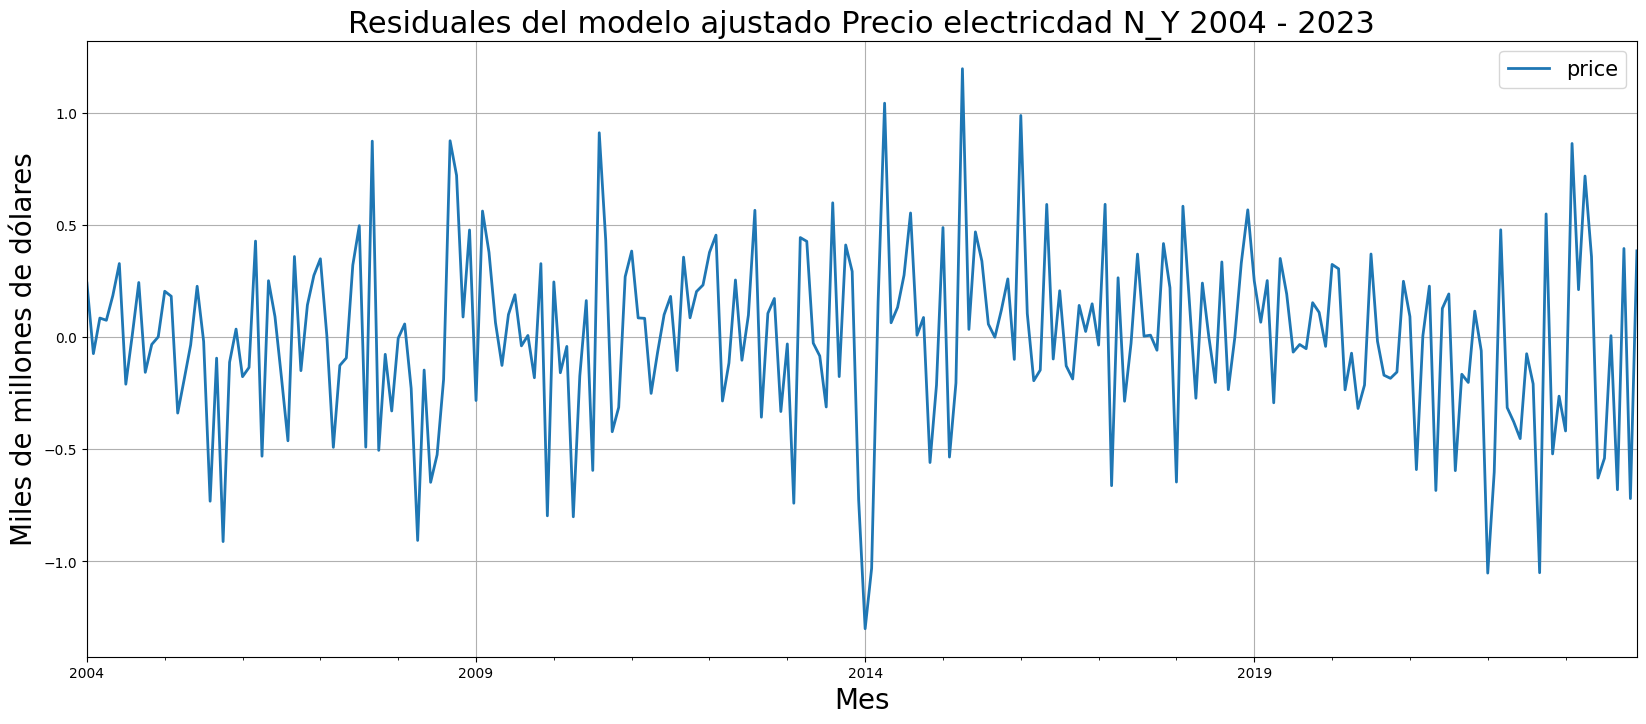

In [781]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ajustado Precio electricdad N_Y 2004 - 2023', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()